# Bootstrapping Credible Intervals

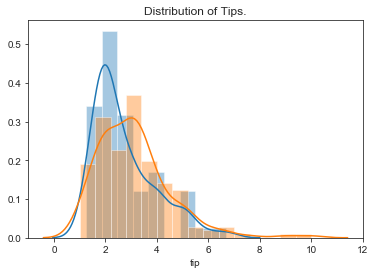

In [6]:
import seaborn as sns
sns.set_style('ticks')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = sns.load_dataset('tips')

"""group_a = df.query("day=='Thur'")['tip']
group_b = df.query("day=='Sun'")['tip']
"""

group_a = df.query("time=='Lunch'")['tip']
group_b = df.query("time=='Dinner'")['tip']

sns.distplot(group_a)
sns.distplot(group_b)
plt.title("Distribution of Tips.")
plt.show()

In [2]:
# Number of Bootstraps doesn't really affect Credible Interval, ONLY ITS CONVERGENCE!
n_bootstraps = 1000

# Each sample drawn should be as big as the original sample (len(group_a))!!!!
# Drawing larger samples would narrow the resulting Credible Interval  thereby simulating
# what CI would result if the ORIGINAL SAMPLE HAD BEEN BIGGER TO BEGIN WITH!!!!!
# This can be used for minimum sample size estimation.
mean_a = np.mean(np.random.choice(group_a, (n_bootstraps, len(group_a))), axis=1)
mean_b = np.mean(np.random.choice(group_b, (n_bootstraps, len(group_b))), axis=1)
# Bootstraped sample size HEAVILY AFFECTS CI (variance of the mean of 10M values sampled from 68
# is waaaaaaay lower than variance of the mean of 68 samples sampled from 68

## Explanation
Each sample drawn should be ***as big as the original sample*** (`len(group_a)`)!!!!
Drawing larger samples would narrow the resulting Credible Interval  thereby simulating
what CI would result if the ***ORIGINAL SAMPLE HAD BEEN BIGGER TO BEGIN WITH***!!!!!
This can be used for minimum sample size estimation. However, sampling a larger number than items in the original sample would lead to wrong results (CI is much narrower)



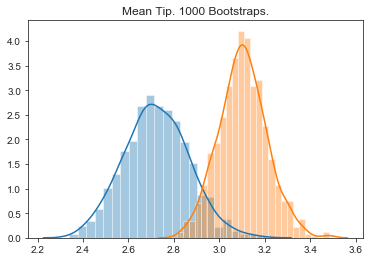

In [3]:
sns.distplot(mean_a)
sns.distplot(mean_b)
plt.title(f"Mean Tip. {n_bootstraps} Bootstraps.")
plt.show()

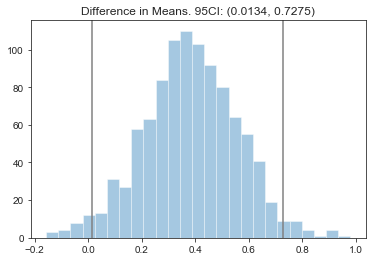

In [4]:
diff_means = mean_b - mean_a
lower, upper = np.round(np.percentile(diff_means, (2.5, 97.5)), 4)
sns.distplot(diff_means, kde=False)
plt.title(fr"Difference in Means. 95CI: {(lower, upper)}")
plt.axvline(lower, color='0.5')
plt.axvline(upper, color='0.5')
plt.show()

#### Sampling n=68=`len(a)` items for b=1000000 times, CI converges to (0.015, 0.72)
#### Sampling n=1000000 (way too many) items for b=10000 times, CI FALSELY NARROWS to (0.36, 0.39)

## Calculating a p-value Equivalent
Combine data of both groups into one pool. Then draw samples sized as the groups from the whole pool. Record their differences in means.
Compare the difference in means between the original groups (`group_a` and `group_b`) with the resampled differences in means.
How often is a difference *as large or larger* recorded?

Observed difference in means = 0.37458221925133595
p-value = 0.035


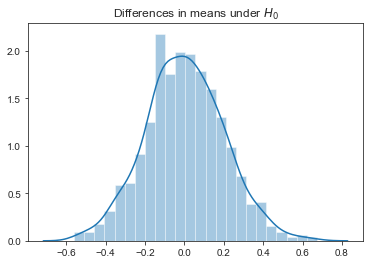

In [12]:
combined = pd.concat([group_a, group_b])

fake_a = np.random.choice(combined, size=(n_bootstraps, len(group_a)))
fake_b = np.random.choice(combined, size=(n_bootstraps, len(group_b)))

fake_mean_a = fake_a.mean(axis=1)
fake_mean_b = fake_b.mean(axis=1)

fake_diffs = fake_mean_a - fake_mean_b
sns.distplot(fake_diffs)
plt.title(r"Differences in means under $H_0$")
print(f"Observed difference in means = {group_b.mean() - group_a.mean()}")
print(f"p-value = {sum(fake_diffs >= group_b.mean() - group_a.mean())/n_bootstraps}")

